In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

dados = pd.read_csv('/kaggle/input/rio-de-janeiro-airbnb-listings-2022/AirbnbRJRentals.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28301 entries, 0 to 28300
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28301 non-null  int64  
 1   name                            28272 non-null  object 
 2   host_id                         28301 non-null  int64  
 3   host_name                       28298 non-null  object 
 4   neighbourhood                   28301 non-null  object 
 5   latitude                        28301 non-null  float64
 6   longitude                       28301 non-null  float64
 7   room_type                       28301 non-null  object 
 8   price                           28301 non-null  int64  
 9   minimum_nights                  28301 non-null  int64  
 10  number_of_reviews               28301 non-null  int64  
 11  last_review                     19783 non-null  object 
 12  reviews_per_month               

Uma vez que os mesmos valores faltantes de host_id e host_name estão inclusos nos faltantes last_review e review_per_month, e que review_per_month pode ser interessante à analise, uma exclusão das linhas nulas foi realizada.

# Examinando ponto de recorte através dos Decis

In [31]:
dados_limpos = dados.dropna()
dados_limpos.select_dtypes('int64').describe().drop(columns={'id', 'host_id'})

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,19781.000000,19781.000000,19781.000000,19781.000000,19781.000000,19781.000000
mean,1208.160710,3.959001,25.040898,8.602497,190.993529,8.808453
std,7355.949295,20.428644,43.059332,24.374662,131.770325,11.802266
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,300.000000,2.000000,3.000000,1.000000,65.000000,1.000000
50%,557.000000,2.000000,9.000000,2.000000,176.000000,4.000000
75%,971.000000,3.000000,27.000000,4.000000,329.000000,12.000000
max,500000.000000,999.000000,563.000000,228.000000,365.000000,174.000000


In [32]:
dados_limpos.room_type.value_counts()

room_type
Entire home/apt    15678
Private room        3787
Shared room          271
Hotel room            45
Name: count, dtype: int64

In [33]:
def consulta_deciles():
    deciles = pd.DataFrame(dados_limpos.select_dtypes('int64').quantile([0.1 * i for i in range(1, 11)]))
    deciles.drop(columns={'id', 'host_id'}, inplace=True)
    return deciles

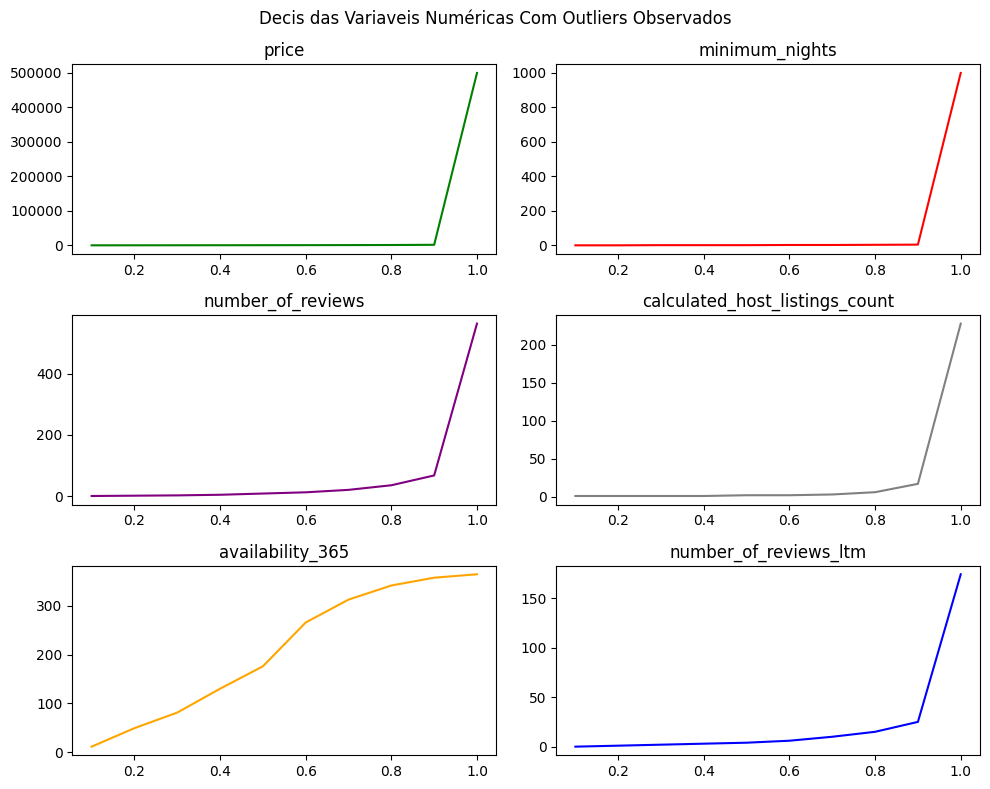

In [34]:
deciles = consulta_deciles()

fig, ax = plt.subplots(ncols=1, sharey = False, figsize = (10, 8))

cores = ['green','red', 'purple', 'gray', 'orange', 'blue']
for d in range(0, len(deciles.columns)):
    plt.subplot(3, 2, d+1)
    plt.plot(deciles[list(deciles.columns)[d]], color=cores[d])
    plt.title(list(deciles.columns)[d])
    
fig.suptitle('Decis das Variaveis Numéricas Com Outliers Observados')
plt.tight_layout()

# Recorte de Dados pelo nono Decil

In [35]:
consulta_deciles()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0.1,170.0,1.0,1.0,1.0,11.0,0.0
0.2,254.0,1.0,2.0,1.0,49.0,1.0
0.3,350.0,2.0,3.0,1.0,81.0,2.0
0.4,450.0,2.0,5.0,1.0,130.0,3.0
0.5,557.0,2.0,9.0,2.0,176.0,4.0
0.6,693.0,3.0,13.0,2.0,266.0,6.0
0.7,853.0,3.0,21.0,3.0,313.0,10.0
0.8,1103.0,4.0,36.0,6.0,342.0,15.0
0.9,1671.0,5.0,68.0,17.0,358.0,25.0
1.0,500000.0,999.0,563.0,228.0,365.0,174.0


Corte nos de mais interesse

In [36]:
dados_limpos = dados_limpos[dados_limpos.price <= deciles.iloc[-2][0]]
dados_limpos = dados_limpos[dados_limpos.number_of_reviews <= deciles.iloc[-2][2]]
dados_limpos = dados_limpos[dados_limpos.number_of_reviews_ltm <= deciles.iloc[-2][5]]
dados_limpos = dados_limpos[dados_limpos.minimum_nights <= deciles.iloc[-2][1]]
# dados_limpos.describe()

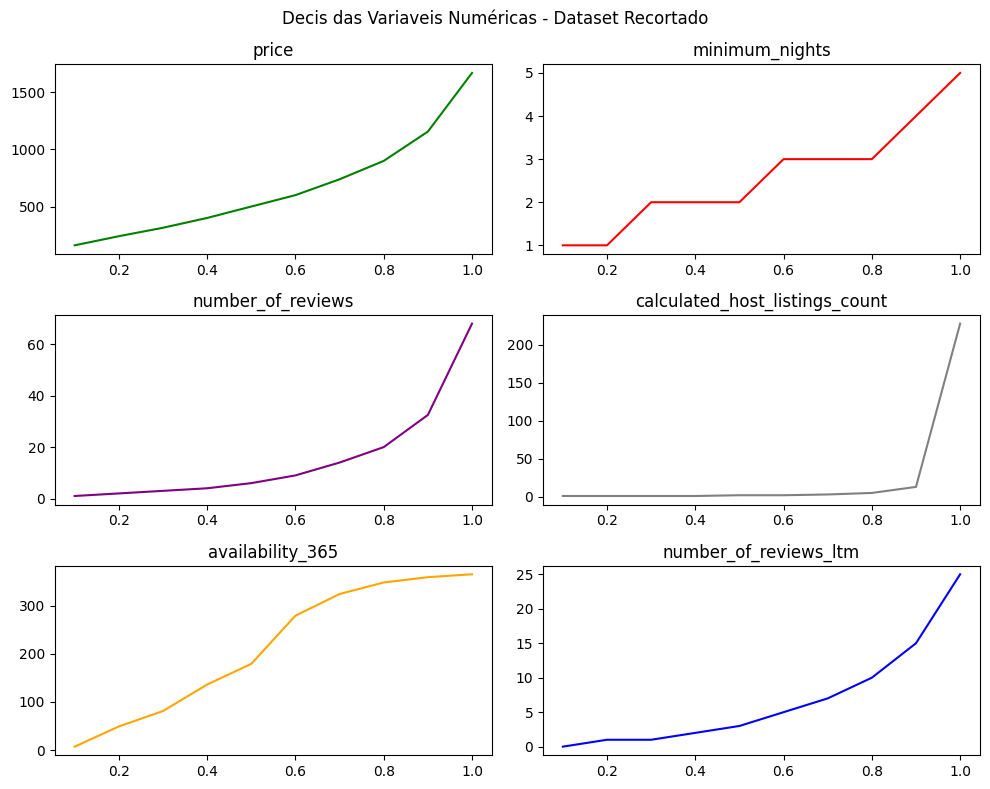

In [37]:
deciles = consulta_deciles()
fig, ax = plt.subplots(ncols=1, sharey = False, figsize = (10, 8))

for d in range(0, len(deciles.columns)):
    plt.subplot(3, 2, d+1)
    plt.plot(deciles[list(deciles.columns)[d]], color=cores[d])
    plt.title(list(deciles.columns)[d])
    
fig.suptitle('Decis das Variaveis Numéricas - Dataset Recortado')
plt.tight_layout()

Visualização de distribuição e tendencia central

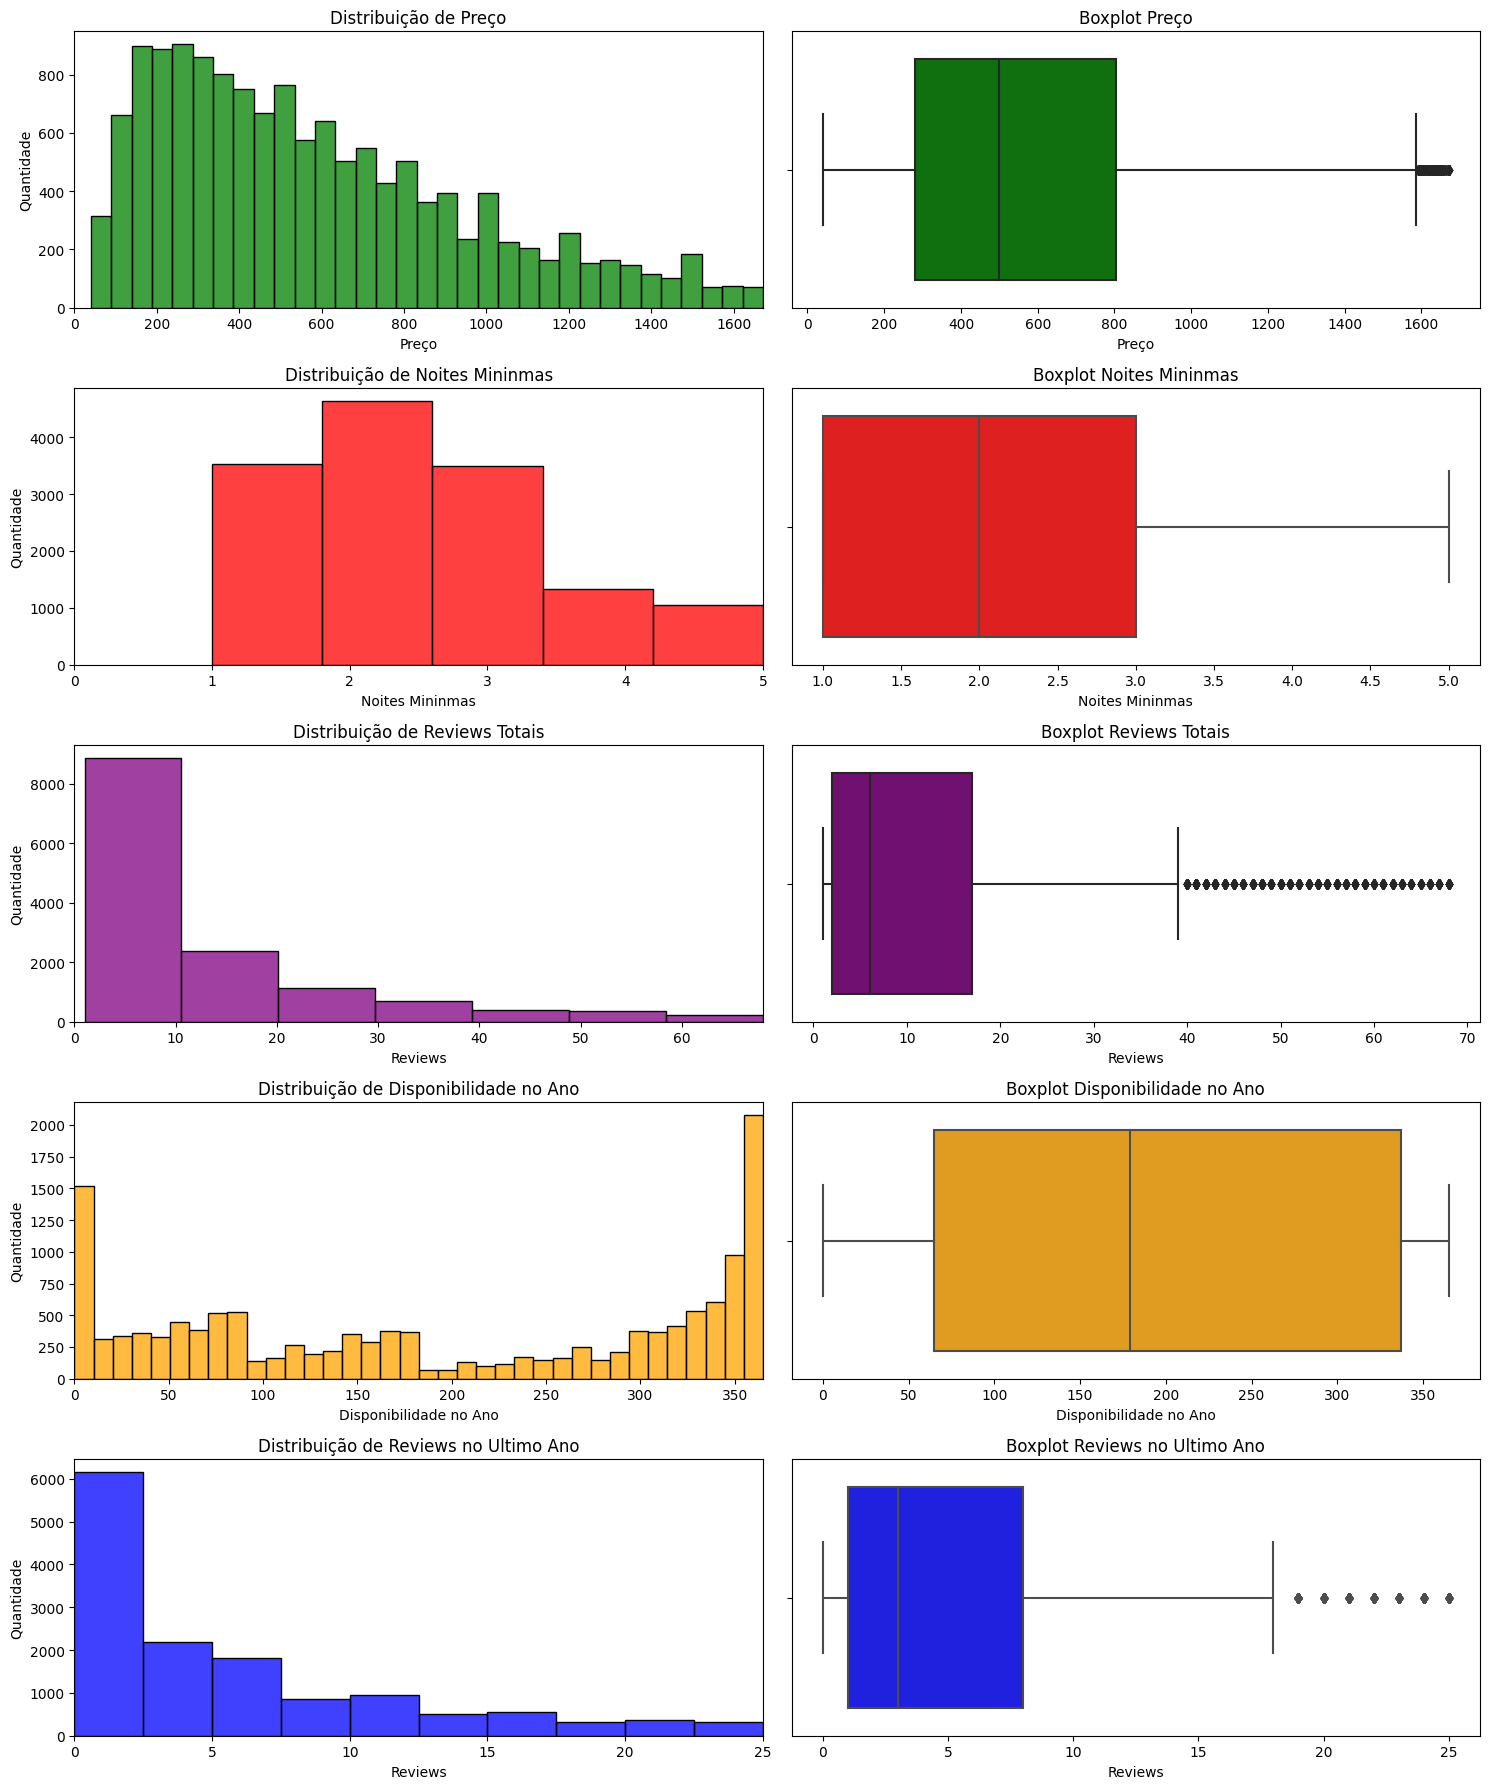

In [38]:
dados_num = dados_limpos.drop(columns={'id','host_id','latitude','longitude'})
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(ncols = 2, nrows=5, sharey = False, figsize = (15, 18))

sns.histplot(dados_num['price'], kde = False, color=cores[0], ax = ax1, bins= 33) # intervalos de tamanho 50.6
ax1.grid(False)
ax1.set_title('Distribuição de Preço')
ax1.set_ylabel('Quantidade')
ax1.set_xlabel('Preço')
ax1.set_xlim(0, dados_num.price.max())

sns.boxplot(x=dados_num['price'], ax = ax2, color=cores[0])
ax2.grid(False)
ax2.set_xlabel('Preço')
ax2.set_title('Boxplot Preço')
plt.tight_layout()

sns.histplot(dados_num['minimum_nights'], kde = False, color=cores[1], ax = ax3, bins= 5) # intervalos de tamanho 1
ax3.grid(False)
ax3.set_title('Distribuição de Noites Mininmas')
ax3.set_ylabel('Quantidade')
ax3.set_xlabel('Noites Mininmas')
ax3.set_xlim(0, dados_num.minimum_nights.max())

sns.boxplot(x=dados_num['minimum_nights'], ax = ax4, color=cores[1])
ax4.grid(False)
ax4.set_xlabel('Noites Mininmas')
ax4.set_title('Boxplot Noites Mininmas')
plt.tight_layout()

sns.histplot(dados_num['number_of_reviews'], kde = False, color=cores[2], ax = ax5, bins= 7) # intervalos de tamanho 9.7
ax5.grid(False)
ax5.set_title('Distribuição de Reviews Totais')
ax5.set_ylabel('Quantidade')
ax5.set_xlabel('Reviews')
ax5.set_xlim(0, dados_num.number_of_reviews.max())

sns.boxplot(x=dados_num['number_of_reviews'], ax = ax6, color=cores[2])
ax6.grid(False)
ax6.set_xlabel('Reviews')
ax6.set_title('Boxplot Reviews Totais')
plt.tight_layout()

sns.histplot(dados_num['availability_365'], kde = False, color=cores[4], ax = ax7, bins= 36) # intervalos de tamanho 10.1
ax7.grid(False)
ax7.set_title('Distribuição de Disponibilidade no Ano')
ax7.set_ylabel('Quantidade')
ax7.set_xlabel('Disponibilidade no Ano')
ax7.set_xlim(0, dados_num.availability_365.max())

sns.boxplot(x=dados_num['availability_365'], ax = ax8, color=cores[4])
ax8.grid(False)
ax8.set_xlabel('Disponibilidade no Ano')
ax8.set_title('Boxplot Disponibilidade no Ano')
plt.tight_layout()

sns.histplot(dados_num['number_of_reviews_ltm'], kde = False, color=cores[5], ax = ax9, bins= 10) # intervalos de tamanho 50.6
ax9.grid(False)
ax9.set_title('Distribuição de Reviews no Ultimo Ano')
ax9.set_ylabel('Quantidade')
ax9.set_xlabel('Reviews')
ax9.set_xlim(0, dados_num.number_of_reviews_ltm.max())

sns.boxplot(x=dados_num['number_of_reviews_ltm'], ax = ax10, color=cores[5])
ax10.grid(False)
ax10.set_xlabel('Reviews')
ax10.set_title('Boxplot Reviews no Ultimo Ano')
plt.tight_layout()

In [39]:
# dados_num = pd.concat([dados_num, pd.get_dummies(dados_num['room_type'], dtype='int')], axis=1)
dados_num['room_type_num'] = dados_num['room_type'].map({'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3})
dados_num.drop(columns={'name', 'host_name', 'neighbourhood', 'room_type', 'last_review'}, inplace=True)
dados_num

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_num
0,581,1,2,0.03,6,181,0,0
3,599,4,1,0.26,4,363,1,2
6,657,2,2,0.55,1,241,2,0
10,500,1,17,0.42,1,90,0,2
16,1293,3,4,1.03,7,62,4,0
...,...,...,...,...,...,...,...,...
28288,1264,2,4,1.11,1,255,4,0
28289,1500,1,11,1.19,107,262,11,0
28292,1200,2,36,0.63,3,54,11,0
28296,871,3,1,0.27,1,365,1,0


Text(0.5, 1.0, 'Matriz de Correlação')

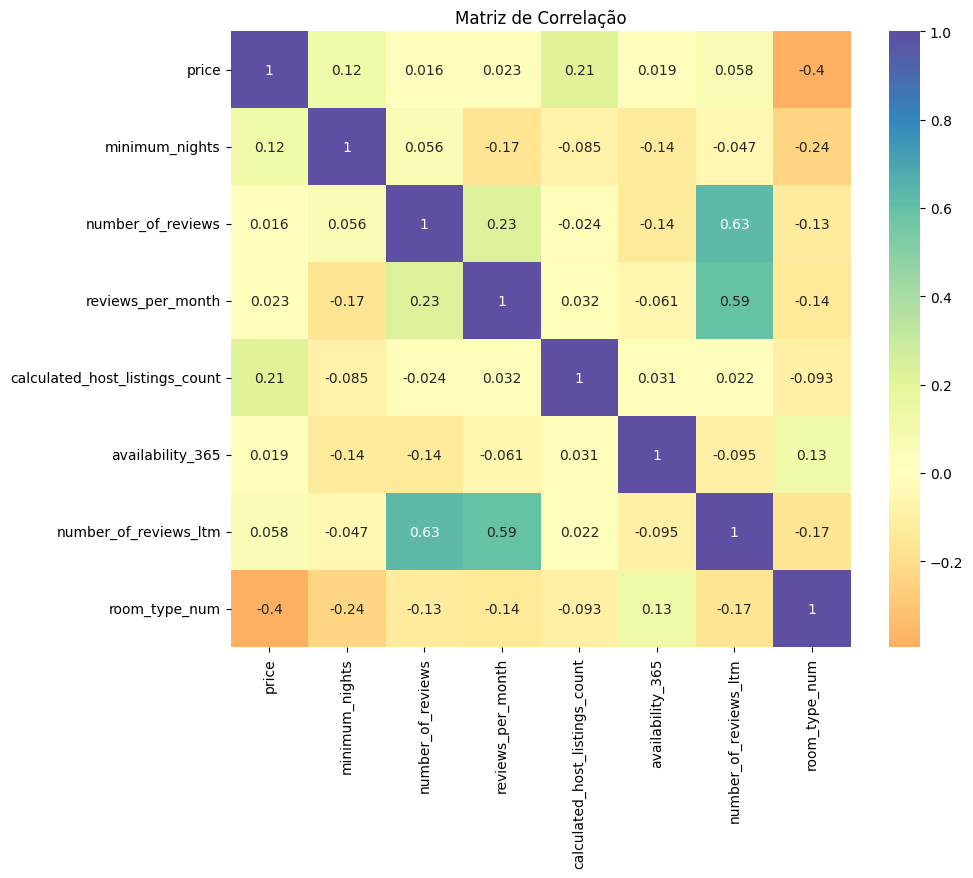

In [40]:
matrix = dados_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='Spectral', center=0)
plt.title('Matriz de Correlação')

In [41]:
dados_num.room_type_num.value_counts()

room_type_num
0    10518
2     3221
3      259
1       28
Name: count, dtype: int64

In [42]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectPercentile, f_regression, mutual_info_regression

def get_scores_by_price(metric):
    selector = SelectKBest(score_func=metric, k=1).fit(dados_num.drop(columns={'price'}), dados_num['price'])
    scores = pd.DataFrame(columns=['cols', 'scores'])
    scores['cols'] = dados_num.columns[1:]
    scores['scores'] = selector.scores_
    return scores

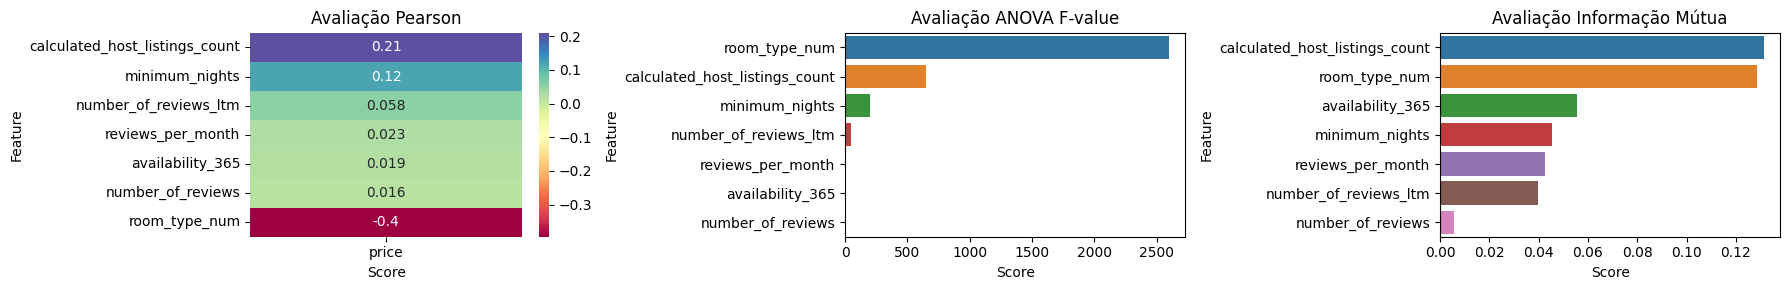

In [43]:
pearson = matrix.sort_values(by='price', ascending=False).iloc[1: , :1]
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = False, figsize = (18, 3))
sns.heatmap(pearson, ax = ax1, cmap='Spectral', annot=True)
ax1.set_title('Avaliação Pearson')
ax1.set_xlabel('Score')
ax1.set_ylabel('Feature')

sns.barplot(get_scores_by_price(f_regression).sort_values(by='scores', ascending=False), y='cols', x='scores', ax = ax2)
ax2.set_title('Avaliação ANOVA F-value')
ax2.set_ylabel('Feature')
ax2.set_xlabel('Score')

sns.barplot(get_scores_by_price(mutual_info_regression).sort_values(by='scores', ascending=False), y='cols', x='scores', ax = ax3)
ax3.set_title('Avaliação Informação Mútua')
ax3.set_ylabel('Feature')
ax3.set_xlabel('Score')

plt.tight_layout()

É claro que Hotel room é uma variavel pouco correlata, de 28 mil registros dos dados originais, apenas 53 são 'Hotel room'

# Arquitetando os Modelos

## Pré Processamento dos dados

{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def padronizacao(df):
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, y_train, X_test_scaled, y_test

In [45]:
def essa_parada_ae(trainX, trainY):
    return {'train': divisao_batch(trainX, trainY)}

In [46]:
def divisao_batch(x, y):
    batchesX, batchesY = [None, None, None, None], [None, None, None, None]
    X_train, X_train2, y_train, y_train2 = train_test_split(x, y, test_size=0.5, random_state=42)
    batchesX[0], batchesX[1], batchesY[0], batchesY[1] = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
    batchesX[2], batchesX[3], batchesY[2], batchesY[3] = train_test_split(X_train2, y_train2, test_size=0.5, random_state=42)
    return batchesX, batchesY

In [47]:
import numpy as np

data_train_X = np.array([]).reshape(0, 7)
data_train_y = np.array([])
data_test_X = np.array([]).reshape(0, 7)
data_test_y = np.array([])

batches = dict()

for i in range(0, 4):
    df = dados_num[dados_num.room_type_num == i]
#     df = dados_num[dados_num.room_type_num == i].iloc[:3000][:] if i == 0 else dados_num[dados_num.room_type_num == i]
    X_train_scaled, y_train, X_test_scaled, y_test = padronizacao(df)
    if i == 0:
        batches = essa_parada_ae(X_train_scaled, y_train)
    else:
        data_train_X = np.concatenate((data_train_X, X_train_scaled))
        data_train_y = np.concatenate((data_train_y, y_train))
        
    data_test_X = np.concatenate((data_test_X, X_test_scaled))
    data_test_y = np.concatenate((data_test_y, y_test))
    
idx = np.random.permutation(range(len(data_train_X)))
data_train_X, data_train_y = data_train_X[idx, :], data_train_y[idx]
idx = np.random.permutation(range(len(data_test_X)))
data_test_X, data_test_y = data_test_X[idx, :], data_test_y[idx]



In [48]:
from sklearn.model_selection import cross_validate

def training_validation(model, trainX, trainY):
    type_metrics = ['accuracy', 'precision_macro', 'recall_macro']
    metrics = cross_validate(model, trainX, trainY, cv=30, scoring=type_metrics)
    return {met: metrics[met] for met in metrics}

In [49]:
def print_avg_training(dict_metrics):
    print(f' -- Accuracy -- Avg: {np.mean(dict_metrics["test_accuracy"]):.3f} Std: {np.std(dict_metrics["test_accuracy"]):.3f}')
    print(f' -- Fit -- Avg: {np.mean(dict_metrics["fit_time"]):.3f} Std: {np.std(dict_metrics["fit_time"]):.3f}')
    print(f' -- Score -- Avg: {np.mean(dict_metrics["score_time"]):.3f} Std: {np.std(dict_metrics["score_time"]):.3f}')
    print(f' -- Precision -- Avg: {np.mean(dict_metrics["test_precision_macro"]):.3f} Std: {np.std(dict_metrics["test_precision_macro"]):.3f}')
    print(f' -- Recall -- Avg: {np.mean(dict_metrics["test_recall_macro"]):.3f} Std: {np.std(dict_metrics["test_recall_macro"]):.3f}')

In [50]:
def show_graph_training(dict_metrics, name_model):
    fig = plt.figure(figsize=(10,5))
    plt.plot(pd.DataFrame(dict_metrics))
    plt.title(name_model + ': Validação Cruzada')
    plt.xlabel('Iterações')
    plt.ylabel('Score')
    fig.legend(list(dict_metrics.keys()), bbox_to_anchor=(1.11, 0.9), loc='upper right')
    

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def print_test_metrics(y_true, y_pred):
    print(f' -- Accuracy -- : {accuracy_score(y_true, y_pred):.4f}')
    print(f' -- Precision -- : {precision_score(y_true, y_pred, average="micro"):.4f}')
    print(f' -- Recall -- : {recall_score(y_true, y_pred, average="micro"):.4f}')

In [52]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(5,5))
#     plt.imgshow(cm, cmap='Blues', interpolation='nearest')
    sns.heatmap(cm, annot=True)
    

## Regressão Logistica Polinomial

 -- Accuracy -- Avg: 0.521 Std: 0.006
 -- Fit -- Avg: 0.041 Std: 0.009
 -- Score -- Avg: 0.004 Std: 0.000
 -- Precision -- Avg: 0.177 Std: 0.069
 -- Recall -- Avg: 0.270 Std: 0.036


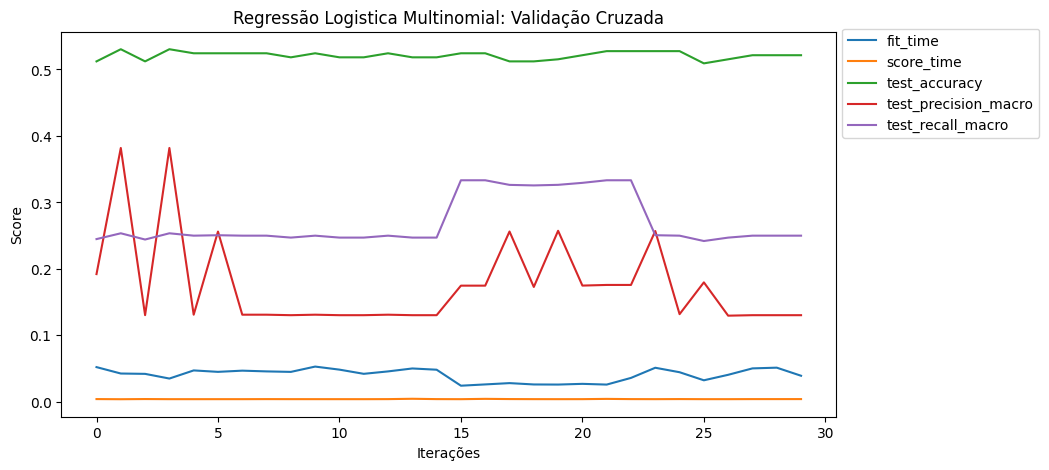

In [65]:
from sklearn.linear_model import LogisticRegression

modelRLM = LogisticRegression(multi_class='multinomial', solver='lbfgs')

for i in range(0, 4):
    train_X_conc = np.concatenate((data_train_X, batches['train'][0][i]))
    train_y_conc = np.concatenate((data_train_y, batches['train'][1][i]))
    metricas_val = training_validation(modelRLM, train_X_conc, train_y_conc)

modelRLM.fit(data_train_X, data_train_y)

print_avg_training(metricas_val)
show_graph_training(metricas_val, 'Regressão Logistica Multinomial')

 -- Accuracy -- : 0.2298
 -- Precision -- : 0.2298
 -- Recall -- : 0.2298


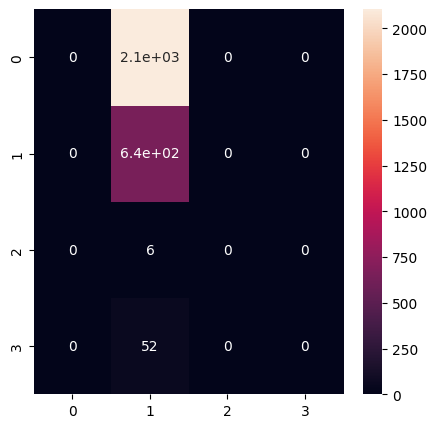

In [66]:
map_categories = dict(enumerate(list(dados_limpos.room_type.unique())))

y_true = np.vectorize(map_categories.get)(data_test_y)
y_pred = np.vectorize(map_categories.get)(modelRLM.predict(data_test_X))

print_test_metrics(y_true, y_pred)
get_confusion_matrix(y_true, y_pred)

In [72]:
pd.DataFrame(y_true).value_counts()

0              
Entire home/apt    2104
Hotel room          645
Shared room          52
Private room          6
Name: count, dtype: int64